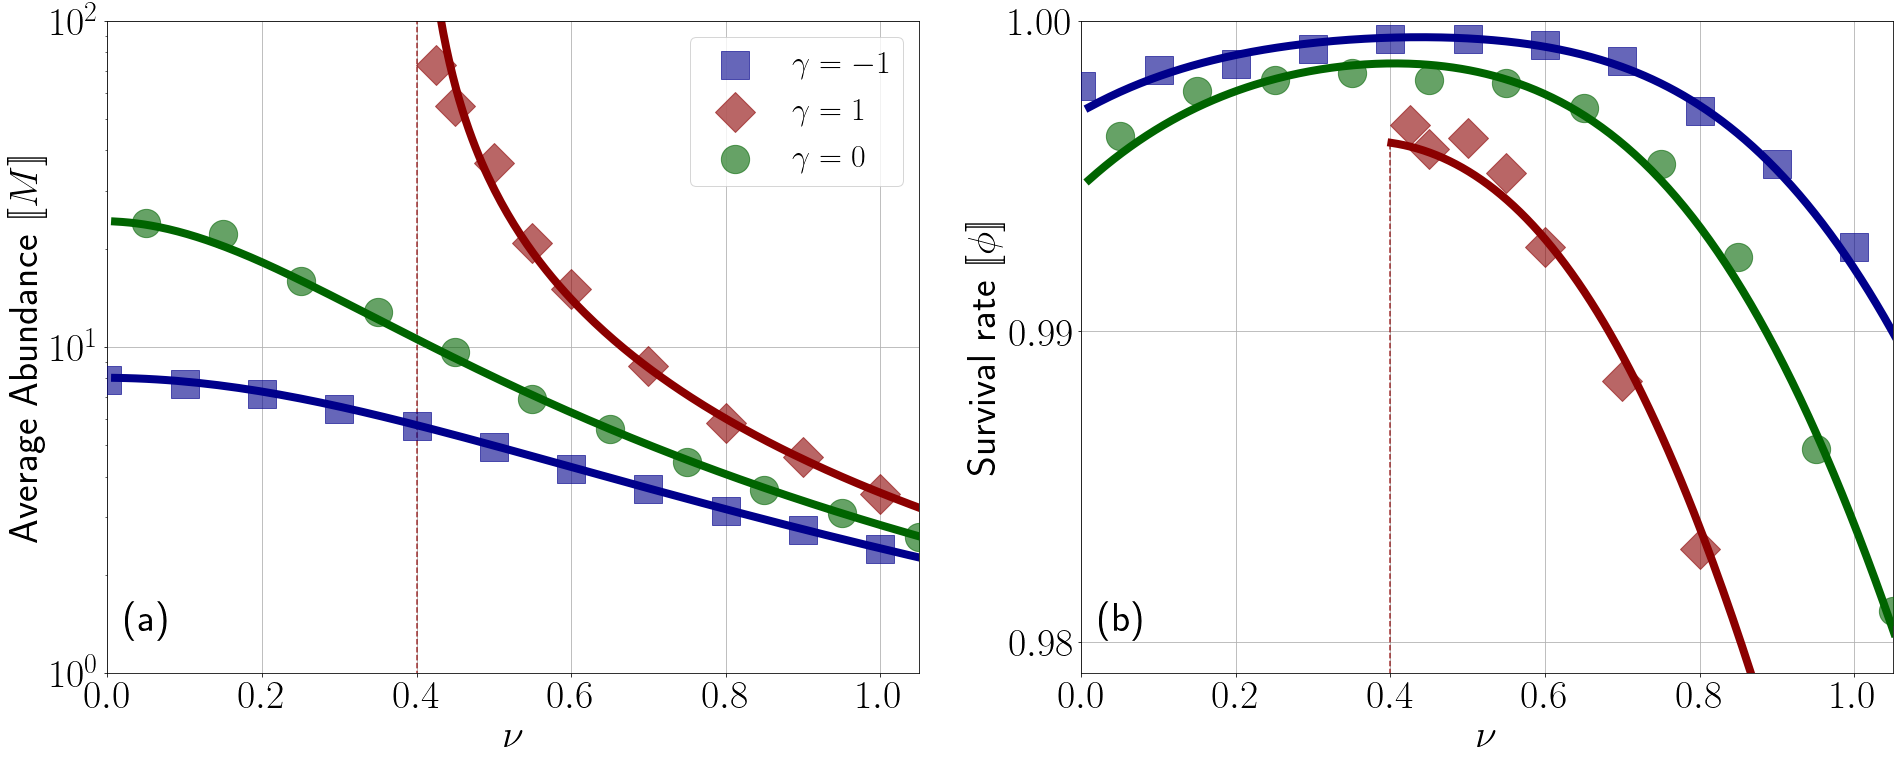

In [85]:
'''
    Figure 1. in the main text
'''

# general marker and other settings
import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

# set this to whatever folder the Fig.1 data is in
dir = gs.dir + "/Fig. 1, M and phi against nu data/"

lwidth = 8
msize = 800
malpha = 0.6
pathlen = 1000

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 40})
fig, axs = plt.subplots(1, 2, figsize=(32,12))


nu = 5.0
sigma = 0.3
rho = 1.5
mu = 0.958

gamma1 = -1
gamma2 = 1
gamma3 = 0

'''
    theory for left plot
'''
'''
    paths1, 2, 3, 4 each contain three columns, the first
    is G = sigma**2 (rho**2 - 1/rho**2)/(4 * nu * u)
    the second and third are \Delta_0 and \Delta_1 respectively.
'''
theoryData1 = np.genfromtxt(dir + "path3.csv") # gamma = -1
theoryData2 = np.genfromtxt(dir + "path4.csv")
theoryData3 = np.genfromtxt(dir + "path2.csv")

path1 = gs.make_path([0.01, nu], [sigma, sigma], [rho, rho], [gamma1, gamma1], pathlen+500)
path2 = gs.make_path([0.01, nu], [sigma, sigma], [rho, rho], [gamma2, gamma2], pathlen+200)
path3 = gs.make_path([0.01, nu], [sigma, sigma], [rho, rho], [gamma3, gamma3], pathlen+600)

M1 = gs.avgM(mu, path1[::4, 0], rho, theoryData1[::4, 1], theoryData1[::4, 2])
skip = 100
M2 = gs.avgM(mu, path2[skip:, 0], rho, theoryData2[skip:, 1], theoryData2[skip:, 2])
M3 = gs.avgM(mu, path3[:, 0], rho, theoryData3[:, 1], theoryData3[:, 2])

axs[0].plot(path1[::4, 0], M1, c = "darkblue", linewidth = lwidth)
axs[0].plot(path2[skip:, 0], M2, c = "darkred", linewidth = lwidth)
axs[0].vlines(0.4, 0, 100, colors = 'darkred', alpha = 0.8, linestyles = 'dashed', linewidth = 1.5)
axs[0].plot(path3[:, 0], M3, c = "darkgreen", linewidth = lwidth)

'''
    data for left plot
'''

simData1 = np.genfromtxt(dir + "M_to_infinity_gam-1.csv", names = None, skip_header = 7, comments = "#", delimiter = ",").reshape(-1, 40, 259)
simData2 = np.genfromtxt(dir + "M_to_infinity.csv", names = None, skip_header = 7, comments = "#", delimiter = ",").reshape(-1, 40, 259)
simData3 = np.genfromtxt(dir + "M_to_infinity_gam-0.csv", names = None, skip_header = 7, comments = "#", delimiter = ",").reshape(-1, 40, 259)

avgSimData1 = np.average(simData1, axis = 1)
avgSimData2 = np.average(simData2, axis = 1)
avgSimData3 = np.average(simData3, axis = 1)

nu1 = avgSimData1[:, 1]
nu2 = avgSimData2[:, 1]
nu3 = avgSimData3[:, 1]

mu1 = avgSimData1[:, 0]
mu2 = avgSimData2[:, 0]
mu3 = avgSimData3[:, 0]

M1 = np.average(avgSimData1[:, 9:], axis = 1)
M2 = np.average(avgSimData2[:, 9:], axis = 1)
M3 = np.average(avgSimData3[:, 9:], axis = 1)


axs[0].scatter(nu1, M1, marker = "s", c = "darkblue", s = msize, zorder=3, alpha = malpha, label = r"$\gamma = -1$")
axs[0].scatter(nu2, M2, marker = "D", c="darkred", s = msize, zorder=3, alpha = malpha, label = r"$\gamma = 1$")
axs[0].scatter(nu3, M3, marker = "o", c = "darkgreen", s = msize, zorder=3, alpha = malpha, label = r"$\gamma = 0$")



'''
    theory for right plot
'''

# small bits of jibbery, avoiding using the limiting form for the survival rate when gamma = 0 by using gamma = 0.01
# the real deal is indistinguishable
gamma3 += 0.01
theoryData3 = np.genfromtxt(dir + "path1.csv")
path3 = gs.make_path([0.01, nu], [sigma, sigma], [rho, rho], [gamma3, gamma3], pathlen + 400)

G1 = theoryData1[:, 0]
nu1 = path1[:, 0]
u1 = sigma**2*(rho**2 - 1/rho**2)/(4*nu1*G1)
phi1 = u1*(1-u1)/(gamma1*sigma**2)

G2 = theoryData2[:, 0]
nu2 = path2[:, 0]
u2 = sigma**2*(rho**2 - 1/rho**2)/(4*nu2*G2)
phi2 = u2*(1-u2)/(gamma2*sigma**2)

G3 = theoryData3[:, 0]
nu3 = path3[:, 0]
u3 = sigma**2*(rho**2 - 1/rho**2)/(4*nu3*G3)
phi3 = u3*(1-u3)/(gamma3*sigma**2)

axs[1].plot(nu1[(phi1>0.995) | (nu1 > 0.5)], phi1[(phi1>0.995) | (nu1 > 0.5)], label = r"$\gamma = -1$", c = "darkblue", linewidth = lwidth) 
axs[1].plot(nu2[nu2>0.4], phi2[nu2>0.4], label = r"$\gamma = 1$", c = "darkred", linewidth = lwidth) 
axs[1].plot(nu3, phi3, label = r"$\gamma = 0$", c = "darkgreen", linewidth = lwidth)

axs[1].vlines(0.4, 0, 0.996, colors = 'darkred', alpha = 0.8, linestyles = 'dashed', linewidth = 1.5)

'''
    simulated data for right plot
'''

phi1 = np.count_nonzero(simData1[:, :, 9:], axis = (1, 2))/(np.count_nonzero(simData1[:, :, 5] != 0, axis = 1)*250)
phi2 = np.count_nonzero(simData2[:, :, 9:], axis = (1, 2))/(np.count_nonzero(simData2[:, :, 5] != 0, axis = 1)*250)
phi3 = np.count_nonzero(simData3[:, :, 9:], axis = (1, 2))/(np.count_nonzero(simData3[:, :, 5] != 0, axis = 1)*250)

nu1 = np.average(simData1, axis = 1)[:, 1]
nu2 = np.average(simData2, axis = 1)[:, 1]
nu3 = np.average(simData3, axis = 1)[:, 1]

axs[1].scatter(nu1, phi1, c = "darkblue", alpha = malpha, s = msize, marker = "s", zorder = 3)
axs[1].scatter(nu2, phi2, c = "darkred", alpha = malpha, marker = "D", s = msize, zorder = 3)
axs[1].scatter(nu3, phi3, c = "darkgreen", alpha = malpha, s = msize, zorder = 3)

'''
    options for the first plot
'''

axs[0].legend(prop={'size': 32})
axs[0].set_xlim(0, 1.05)
axs[0].set_yscale("log")
axs[0].set_ylim(1, 100.0)
axs[0].grid("true")

axs[0].set_ylabel(r'Average Abundance $[\![ M ]\!]$')
axs[0].set_xlabel(r'$\nu$')

'''
    plot settings for right plot
'''

axs[1].set_xlim(0, 1.05)
axs[1].set_ylim(0.979, 1)
axs[1].set_yticks([0.98, 0.99, 1.00])
axs[1].grid("true")


axs[1].set_ylabel(r'Survival rate $[\![ \phi ]\!]$')
axs[1].set_xlabel(r'$\nu$')

axs[0].text(0.05, 0.08, '(a)', horizontalalignment='center', verticalalignment='center', transform = axs[0].transAxes)
axs[1].text(0.05, 0.08, '(b)', horizontalalignment='center', verticalalignment='center', transform = axs[1].transAxes)

# plt.savefig("Fig. 1: theory working demonstration.pdf")

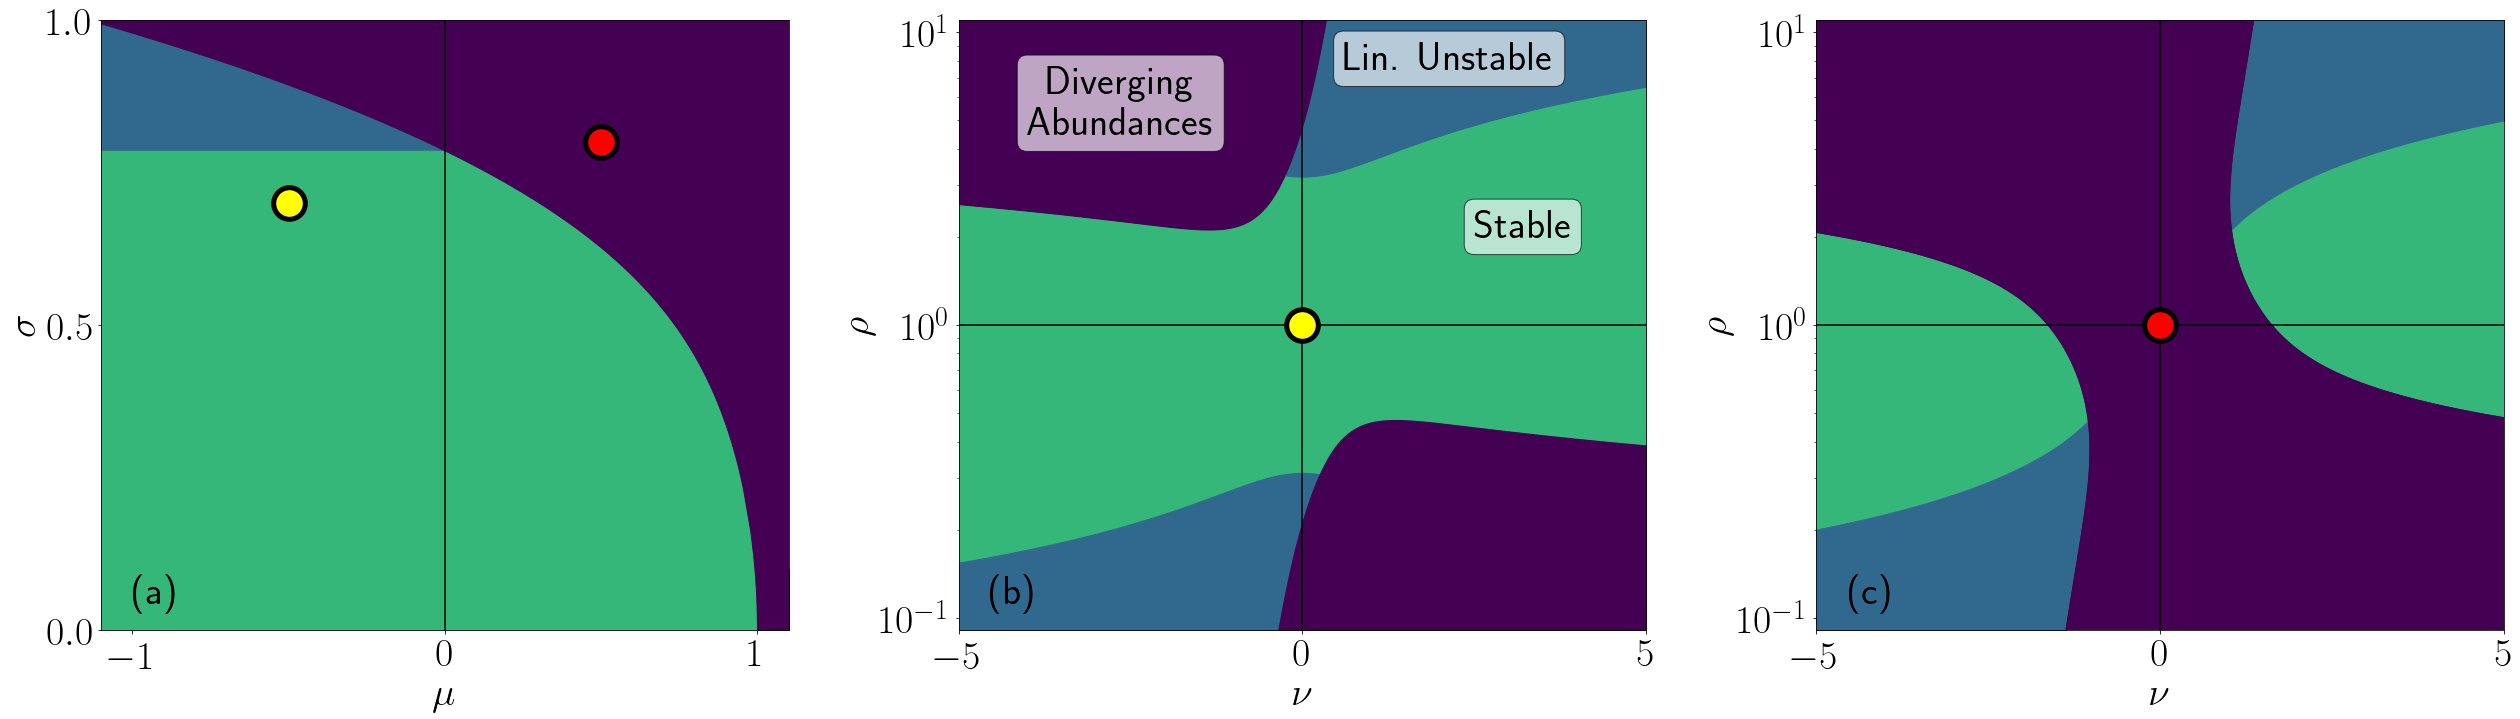

In [2]:
'''
    Fig. 2 in the main text
'''
import matplotlib.pyplot as plt
import numpy as np
import General_Solutions as gs


dir = gs.dir + "/Fig. 2, phase plots rho-nu plane/"

f = 2
fig, axs = plt.subplots(1, 3, figsize=(18*f, 5.5*f))

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 40})
N = 4
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.CMRmap(np.linspace(0,1,N)))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

color1 = next(plt.gca()._get_lines.prop_cycler)['color']
color2 = next(plt.gca()._get_lines.prop_cycler)['color']
color3 = next(plt.gca()._get_lines.prop_cycler)['color']
color4 = next(plt.gca()._get_lines.prop_cycler)['color']
color5 = next(plt.gca()._get_lines.prop_cycler)['color']

# mu = 0.5 or -0.5
# sigma = 0.8 or 0.7
# gamma = 0.8

# general marker and other settings
lwidth = 1
msize = 800
malpha = 0.6
salpha = 1


'''
    Panel (a)
'''

# middle plot, the one bucket stability plot in the sigma, mu plane
def _mu(gamma, D):
    return D*gs.w2(D)/(gs.w1(D)*(gs.w2(D) + gamma*gs.w0(D)))

def _sigma(gamma, D):
    return np.sqrt(gs.w2(D))/(gs.w2(D) + gamma*gs.w0(D))

D = np.concatenate((np.linspace(-1.0, 4.0, 200), np.linspace(4.01, 1000, 500)), axis = None)

# minfty line
minfty_mu = _mu(0.8, D)
minfty_sig = _sigma(0.8, D)
opper_sig = np.full(700,np.sqrt(2)/1.8)

# filling
axs[0].fill_between(np.linspace(-1.1, 0, 700), np.linspace(1, 1, 700), opper_sig, color = color2, alpha = salpha)
axs[0].fill_between(minfty_mu, np.minimum(minfty_sig, opper_sig), color = color3, alpha = salpha)
axs[0].fill_betweenx(minfty_sig, minfty_mu, np.full(700, 2), color = color1, alpha = salpha)
axs[0].fill_betweenx([0, 0.1], [1, 1], [2, 2], color = color1, alpha = salpha)

axs[0].set_xlim(-1.1, 1.1)
axs[0].set_ylim(0, 1.0)
axs[0].vlines(0, 0, 1.5)
axs[0].set_xlabel(r"$\mu$")
axs[0].set_ylabel(r"$\sigma$")

'''
    Panel (b)
'''

# bottom right, opper lines in the rho nu plane

opper_b = np.genfromtxt(dir + "oppersig=0.7.csv")
minfty_b = np.genfromtxt(dir + "minftysig=0.7mu=-0.5.csv")

# reverse to the axes can be aligned
opper_rho = opper_b[:, 0][::-1]
# interpolate so that the two curves have the same x coords, filling between two curves doesnt work without this
minfty_rho = np.concatenate((np.interp(np.linspace(-5, 1, 600), np.linspace(-5, 1, 500), minfty_b[:, 0]), np.full(400, 20)))

mask = (opper_rho <= minfty_rho)
axs[1].plot(np.linspace(-5, 5, 1000)[mask], opper_rho[mask], linewidth = lwidth, color = color2)
axs[1].plot(-np.linspace(-5, 5, 1000)[mask], 1/opper_rho[mask], linewidth = lwidth, color = color2)


axs[1].plot(np.linspace(-5, 5, 1000), minfty_rho, color = color1, linewidth = lwidth)
axs[1].plot(-np.linspace(-5, 5, 1000), 1/minfty_rho, color = color1, linewidth = lwidth)

# filling for different stability regions
# stable
axs[1].fill_between(np.linspace(-5, 5, 1000), np.minimum(minfty_rho, opper_rho), 
                                                1/np.minimum(minfty_rho, opper_rho)[::-1], color = color3, alpha = salpha)

# metastable
# # above
axs[1].fill_between(np.linspace(-5, 5, 1000), opper_rho, minfty_rho, where = minfty_rho >= opper_rho, color = color2, alpha = salpha)
# # below
axs[1].fill_between(-np.linspace(-5, 5, 1000), 1/opper_rho, 1/minfty_rho, where = minfty_rho >= opper_rho, color = color2, alpha = salpha)

# divergence
axs[1].fill_between(np.linspace(-5, 5, 1000), minfty_rho, np.full(1000, 20), color = color1, alpha = salpha)
axs[1].fill_between(-np.linspace(-5, 5, 1000), 1/minfty_rho, 1/np.full(1000, 20), color = color1, alpha = salpha)


# other settings 
axs[1].set_yscale("log")
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(1/11, 11)
axs[1].hlines(1, -5, 5, zorder = 5)
axs[1].vlines(0, 0, 11, zorder = 5)

'''
    Panel (c)
'''

# Bottom left, Minfty lines in the rho nu plane
minfty_c = np.genfromtxt(dir + "minftysig=0.8mu=0.5.csv")
opper_c = np.genfromtxt(dir + "oppersig=0.8.csv")

minfty_nu = minfty_c[::-1, 0]
# interpolate so that the two curves have the same y coords, filling between two curves doesnt work without this
opper_nu = np.concatenate((np.interp(np.linspace(0.01, 5.156, 454), np.linspace(0.01, 5.155994326976409248e+00, 1200), opper_c[::-1, 0]), np.full(546, 10)))

axs[2].plot(minfty_nu, np.linspace(0.01, 11, 1000), color = color1, linewidth = lwidth)
axs[2].plot(-minfty_nu, 1/np.linspace(0.01, 11, 1000), color = color1, linewidth = lwidth)

# # filling for different stability regions
# stable
axs[2].fill_betweenx(np.linspace(0.01, 11, 1000), np.maximum(minfty_nu, opper_nu), np.full(1000, 6), alpha = salpha, color = color3)
axs[2].fill_betweenx(1/np.linspace(0.01, 11, 1000), np.minimum(-minfty_nu, -opper_nu), np.full(1000, -6), alpha = salpha, color = color3)

# metastable
axs[2].fill_betweenx(np.linspace(0.01, 11, 1000), minfty_nu, opper_nu, where=opper_nu >= minfty_nu, alpha = salpha, color = color2)
axs[2].fill_betweenx(1/np.linspace(0.01, 11, 1000), -minfty_nu, -opper_nu, where = opper_nu >= minfty_nu, alpha = salpha, color = color2)

# divergence
axs[2].fill_betweenx(np.linspace(0.01, 11, 1000), minfty_nu, 
                                                0, color = color1, alpha = salpha)
axs[2].fill_betweenx(1/np.linspace(0.01, 11, 1000), -minfty_nu, 
                                                0, color = color1, alpha = salpha)

axs[2].set_yscale("log")
axs[2].set_xlim(-5, 5)
axs[2].set_ylim(1/11, 11)
axs[2].hlines(1, -5, 5, zorder = 5)
axs[2].vlines(0, 0, 11, zorder = 5)

'''
    Other settings
'''
# points where the neighbouring plots are from
# [mu, sig] = [-0.5, 0.7], [0.5, 0.8]
axs[0].scatter([-0.5], [0.7], color = "yellow", s = 1000, edgecolor = 'black', linewidth = 5, zorder = 10)
axs[0].scatter([0.5], [0.8], color = "red", s = 1000, edgecolor = 'black', linewidth = 5, zorder = 10)
axs[1].scatter([0.0], [1.0], color = "yellow", s = 1000, edgecolor = 'black', linewidth = 5, zorder = 10)
axs[2].scatter([0.0], [1.0], color = "red", s = 1000, edgecolor = 'black', linewidth = 5, zorder = 10)

# labels and ticks
axs[0].set_xticks([-1, 0, 1])
axs[0].set_yticks([0.0, 0.5, 1.0])

axs[1].set_xticks([-5, 0, 5])
axs[1].set_yticks([0.1, 1, 10])
axs[1].set_xlabel(r"$\nu$")
axs[1].set_ylabel(r"$\rho$")

axs[2].set_xticks([-5, 0, 5])
axs[2].set_yticks([0.1, 1, 10])
axs[2].set_xlabel(r"$\nu$")
axs[2].set_ylabel(r"$\rho$")

# labels for different stability regions
axs[1].text(-4, 4.5, "Diverging\nAbundances", size=40,ma = 'center', bbox=dict(facecolor='white', alpha=0.65, boxstyle="round", pad = 0.25))
axs[1].text(0.6, 7.5, "Lin. Unstable", ma = 'center', bbox=dict(facecolor='white', alpha=0.65, boxstyle="round", pad = 0.25))
axs[1].text(2.5, 2, "Stable", ma = 'center', bbox=dict(facecolor='white', alpha=0.65, boxstyle="round", pad = 0.25))

# panel labels
axs[0].text(0.08, 0.06, '(a)', horizontalalignment='center', verticalalignment='center', transform = axs[0].transAxes)
axs[1].text(0.08, 0.06, '(b)', horizontalalignment='center', verticalalignment='center', transform = axs[1].transAxes)
axs[2].text(0.08, 0.06, '(c)', horizontalalignment='center', verticalalignment='center', transform = axs[2].transAxes)

fig.tight_layout()

# plt.savefig("Fig. 2: rho-nu plane phase plots.pdf")



/tmp/ipykernel_184793/3645921693.py:52: RuntimeWarning: divide by zero encountered in true_divide
  sig = np.sqrt(2)/(1 + gamma)


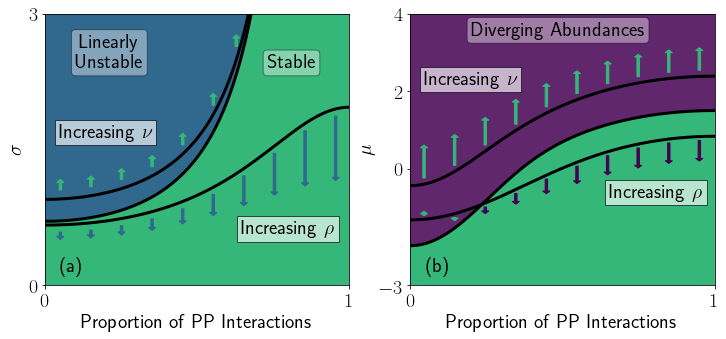

In [83]:
'''
    Fig. 3
'''
import matplotlib.pyplot as plt
import numpy as np
import General_Solutions as gs

dir = gs.dir + "/Fig. 3, phase plots sig-gamma and mu-gamma planes/"

f = 1
fig, axs = plt.subplots(1, 2, figsize=(12*f, 5*f))

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})
N = 4
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.CMRmap(np.linspace(0,1,N)))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

color1 = next(plt.gca()._get_lines.prop_cycler)['color']
color2 = next(plt.gca()._get_lines.prop_cycler)['color']
color3 = next(plt.gca()._get_lines.prop_cycler)['color']
color4 = next(plt.gca()._get_lines.prop_cycler)['color']
color5 = next(plt.gca()._get_lines.prop_cycler)['color']


# general marker and other settings
lwidth = 3
msize = 800
malpha = 0.6
salpha = 1

# p = proportion of predator prey pairs
p = np.linspace(0, 1, 200)
gamma = np.cos(np.pi*p)

'''
    Panel (a)
'''

sig_rho1 = np.genfromtxt(dir + "sig-gamPlaneOppernu = 3.csv")
sig_rho1_plus = np.genfromtxt(dir + "sig-gamPlaneOppernu = 4.csv")
sig_nu1 = np.genfromtxt(dir + "sig-gamPlaneOpperrho = 3.csv")
sig_nu1_plus = np.genfromtxt(dir + "sig-gamPlaneOpperrho = 4.csv")

for idx in range(10):
    axs[0].arrow(p[20*idx+10], sig_rho1[20*idx+10]-0.08, 0, sig_rho1_plus[20*idx+10]-sig_rho1[20*idx+10], width = 0.008, color=color2)
    if idx < 6:
        axs[0].arrow(p[20*idx+10], sig_nu1[20*idx+10]+0.1, 0, sig_nu1_plus[20*idx+10]-sig_nu1[20*idx+10], width = 0.008, color=color3)
    if idx == 6:
        axs[0].arrow(p[20*idx+5], sig_nu1[20*idx+5]+0.15, 0, sig_nu1_plus[20*idx+5]-sig_nu1[20*idx+5], width = 0.008, color=color3)

sig = np.sqrt(2)/(1 + gamma)

axs[0].plot(p, sig_rho1, linewidth = lwidth, color = "black", linestyle="-", label=r"$\rho=4$")
axs[0].plot(p, sig_nu1, linewidth = lwidth, color = "black", linestyle="-", label=r"$\nu=4$")

axs[0].plot(p, sig, linewidth = lwidth, color = "black", label=r"$\rho=1, \nu=0$")

axs[0].set_xlabel(r"Proportion of PP Interactions")
axs[0].set_ylabel(r"$\sigma$")
axs[0].set_xticks([0.0, 1.0])
axs[0].set_yticks([0,3])
axs[0].set_ylim(0, 3)
axs[0].set_xlim(0, 1)


axs[0].fill_between(p, sig, color = color3)
axs[0].fill_between(p, sig, np.linspace(9, 9, 200), color = color2)
axs[0].fill_between(p[180:], np.linspace(9, 9, 20), color = color3)


axs[0].text(p[160]-0.16, sig_rho1[160]-1.1, r"Increasing $\rho$",bbox=dict(facecolor='white', alpha=0.65))
axs[0].text(p[5]+0.02, sig_nu1_plus[5]+0.6, r"Increasing $\nu$",bbox=dict(facecolor='white', alpha=0.65))

'''
    Panel (b)
'''

mu_p = np.genfromtxt(dir + "mu-gamplaneMinftynu=0rho=1.csv")
mu_p_nu3 = np.genfromtxt(dir + "mu-gamplaneMinftynu=3rho=1.csv")
mu_p_nu4 = np.genfromtxt(dir + "mu-gamplaneMinftynu=4rho=1.csv")
mu_p_rho3 = np.genfromtxt(dir + "mu-gamplaneMinftynu=0rho=3.csv")
mu_p_rho4 = np.genfromtxt(dir + "mu-gamplaneMinftynu=0rho=4.csv")

def mu_from_data(data, nu, rho):
    return (data[:, 2]*rho**2 + data[:, 1])/(data[:, 2]*rho**2 - data[:, 1])*nu

# setting nu = 0.05 and rho = 1.02 rather than nu = 0 and rho = 1
mu_p = mu_from_data(mu_p, 0.05, 1.02)
mu_p_nu3 = mu_from_data(mu_p_nu3, 3.00, 1.02)
mu_p_nu4 = mu_from_data(mu_p_nu4, 4.00, 1.02)
mu_p_rho3 = mu_from_data(mu_p_rho3, 0.05, 3.00)
mu_p_rho4 = mu_from_data(mu_p_rho4, 0.05, 4.00)

axs[1].plot(p[::-1], mu_p, linewidth = lwidth, color = "black", linestyle="-")
axs[1].plot(p[::-1], mu_p_nu3, linewidth = lwidth, color = "black", linestyle="-")
axs[1].plot(p[::-1], mu_p_rho3, linewidth = lwidth, color = "black", linestyle="-")

plt.fill_between(p[::-1], np.linspace(-9, -9, 200), mu_p, color = color3)
plt.fill_between(p[::-1], mu_p, np.linspace(9, 9, 200), color = color1, alpha = 0.85)



for idx in range(10):
    axs[1].arrow(p[::-1][20*idx+10], mu_p_nu3[20*idx+10]+0.16, 0, mu_p_nu4[20*idx+10]-mu_p_nu3[20*idx+10], width = 0.008, color=color3, head_length = 2*4.5*0.008)
    if idx < 8:
        axs[1].arrow(p[::-1][20*idx+10], mu_p_rho3[20*idx+10]-0.1, 0, mu_p_rho4[20*idx+10]-mu_p_rho3[20*idx+10], width = 0.008, color=color1, head_length = 2*4.5*0.008)
    if idx == 8:
        axs[1].arrow(p[::-1][20*idx+10], mu_p_rho3[20*idx+10]-0.1, 0, mu_p_rho4[20*idx+10]-mu_p_rho3[20*idx+10], width = 0.008, color=color3, head_length = 2*4.5*0.008)
    if idx == 9:
        axs[1].arrow(p[::-1][20*idx+10], mu_p_rho3[20*idx+10]+0.1, 0, mu_p_rho4[20*idx+10]-mu_p_rho3[20*idx+10], width = 0.008, color=color3, head_length = 2*4.5*0.008)


axs[1].set_xlabel(r"Proportion of PP Interactions")
axs[1].set_ylabel(r"$\mu$")
axs[1].set_xticks([0.0, 1.0])
axs[1].set_yticks([-3,0,2, 4])
axs[1].set_ylim(-3, 4)
axs[1].set_xlim(0, 1)


axs[1].text(p[160]-0.15, mu_p_nu4[160]-1.6, r"Increasing $\rho$",bbox=dict(facecolor='white', alpha=0.65))
axs[1].text(p[5]+0.02, mu_p_rho4[5]+1.8, r"Increasing $\nu$",bbox=dict(facecolor='white', alpha=0.65))

axs[0].annotate('Linearly\nUnstable', xy=(0.1, 0.8), xycoords='axes fraction', ma='center',
                bbox=dict(facecolor='white', alpha=0.4, boxstyle='round', pad = 0.2))
axs[0].annotate('Stable', xy=(0.73, 0.8), xycoords='axes fraction', ma='center',
                bbox=dict(facecolor='white', alpha=0.4, boxstyle='round', pad = 0.2))

axs[1].annotate('Diverging Abundances', xy=(0.2, 0.92), xycoords='axes fraction', ma='center',
                bbox=dict(facecolor='white', alpha=0.4, boxstyle='round', pad = 0.2))


axs[0].annotate('(a)', xy=(0.05, 0.05), xycoords='axes fraction')
axs[1].annotate('(b)', xy=(0.05, 0.05), xycoords='axes fraction')

# plt.savefig("Fig. 3: PP interaction phase plots.pdf")

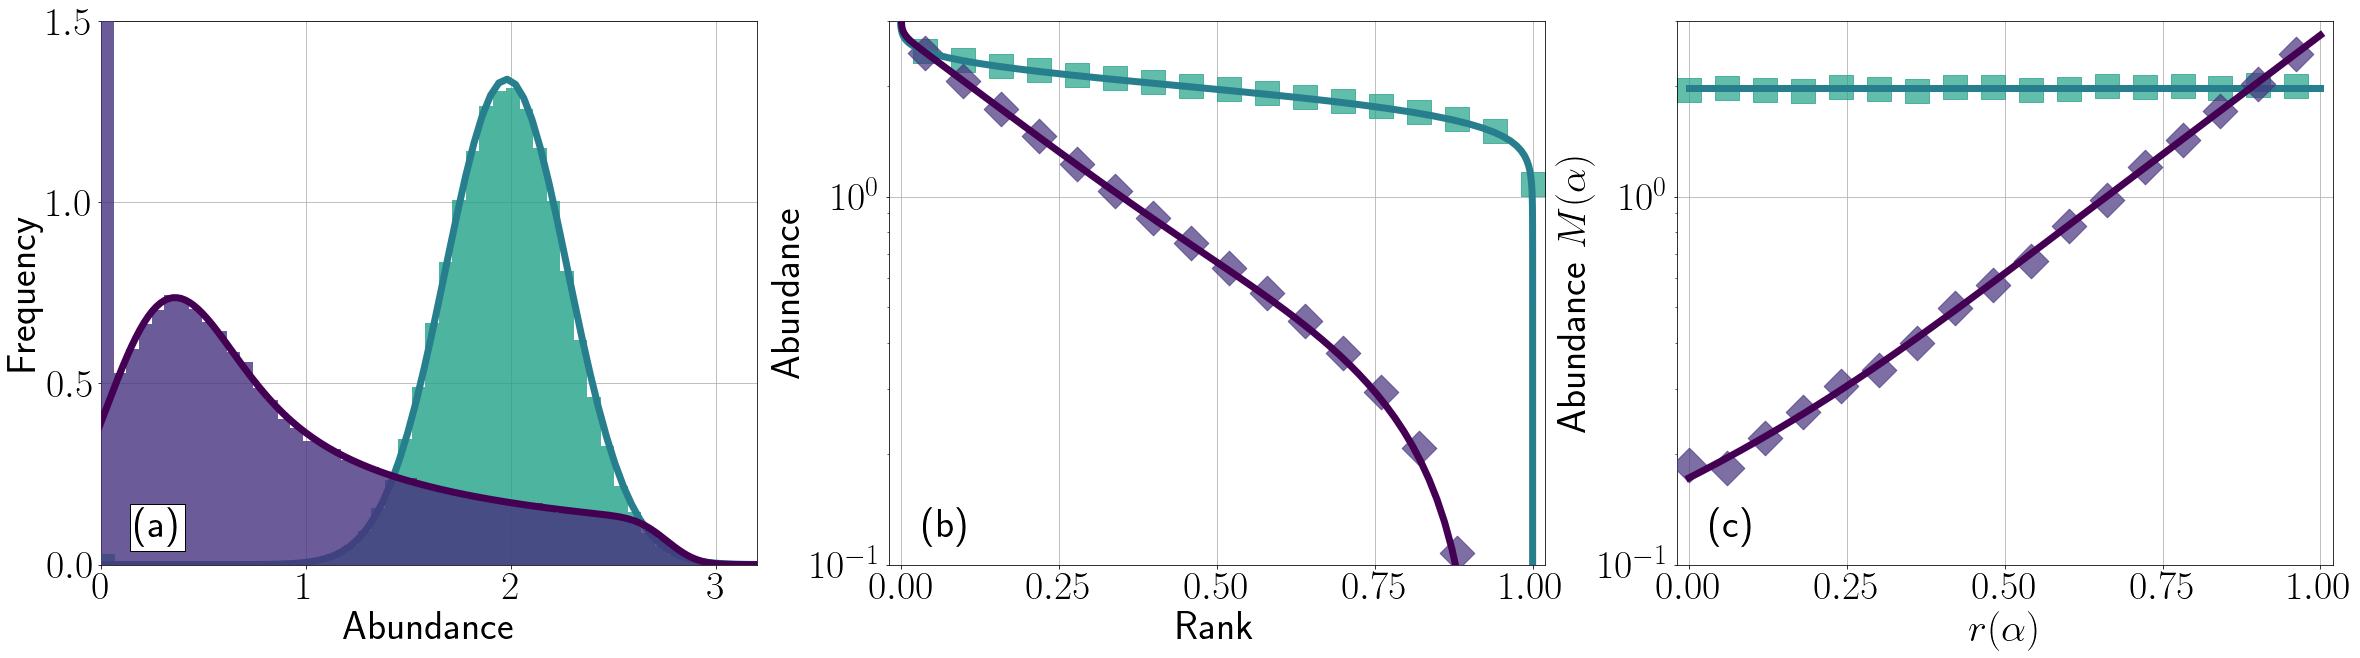

In [81]:
import General_Solutions as gs
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as opt

dir = gs.dir + "/Fig. 4, Abundance distributions/"


# Plot settings
f = 2
fig, axs = plt.subplots(1, 3, figsize=(20*f, 5*f))

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 40})
N = 8

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

color1 = next(plt.gca()._get_lines.prop_cycler)['color']
color2 = next(plt.gca()._get_lines.prop_cycler)['color']
color3 = next(plt.gca()._get_lines.prop_cycler)['color']
color4 = next(plt.gca()._get_lines.prop_cycler)['color']
color5 = next(plt.gca()._get_lines.prop_cycler)['color']
color6 = next(plt.gca()._get_lines.prop_cycler)['color']
color7 = next(plt.gca()._get_lines.prop_cycler)['color']
color8 = next(plt.gca()._get_lines.prop_cycler)['color']

# general marker and other settings
lwidth = 7
msize = 600
malpha = 0.8
salpha = 0.7

mu = 0.5
nu = 1.5
sigma = 0.15
rho = 1/1.5
gamma = -0.3

# the corresponding values of u, d0, d1 for the parameter choice above
# to see how to calculate this, see Examples.ipynb
u, d0, d1 = [ 1.00623867,  0.4621497,  24.10574192]

# data for the abundance distributions (for panels (a) and (b))
data_nu_withHierarchy = np.genfromtxt(dir + "AD_two_peaks.csv", skip_header = 7, names = None, delimiter = ',')
dataView_nu_withHierarchy = data_nu_withHierarchy.view(dtype = np.float64).reshape((-1, 500 + 9))

data_nu_withoutHierarchy = np.genfromtxt(dir + "AD_two_peaks_OB.csv", skip_header = 7, names = None, delimiter = ',')
dataView_nu_withoutHierarchy = data_nu_withoutHierarchy.view(dtype = np.float64).reshape((-1, 500 + 9))

'''
    Panel (a)
'''

m_withHierarchy = np.linspace(-5, 5, 500)
AD_withHierarchy = np.genfromtxt(dir + "AD_withHierarchy.csv")
axs[0].plot(m_withHierarchy, AD_withHierarchy, linewidth = lwidth, color = color1, zorder = 7)


m_withoutHierarchy = np.linspace(0, 4, 100)
AD_withoutHierarchy = np.genfromtxt(dir + "AD_withoutHierarchy.csv")
axs[0].plot(m_withoutHierarchy, AD_withoutHierarchy, linewidth = lwidth, color = color4, zorder = 5)

axs[0].hist(dataView_nu_withHierarchy[:, 8:].flatten(), bins = 50, density = True, alpha = malpha, color = color2, zorder = 6)
axs[0].hist(dataView_nu_withoutHierarchy[:, 8:].flatten(), bins = 50, density = True, alpha = malpha, color = color5, zorder = 4)


'''
    Panel (b)
'''

RANK_D_withHierarchy = 1-np.cumsum(AD_withHierarchy)[1:]*np.diff(m_withHierarchy)
RANK_D_withoutHierarchy = 1-np.cumsum(AD_withoutHierarchy)[1:]*np.diff(m_withoutHierarchy)

order_withHierarchy = np.sort(dataView_nu_withHierarchy[:, 9:], axis = 1)
order_withoutHierarchy = np.sort(dataView_nu_withoutHierarchy[:, 9:], axis = 1)

alpha = np.linspace(0, 1, 500)

axs[1].plot(RANK_D_withHierarchy, m_withHierarchy[1:], linewidth = lwidth, color = color1, zorder = 7)
axs[1].plot(RANK_D_withoutHierarchy, m_withoutHierarchy[1:], linewidth = lwidth, color = color4, zorder = 5)

axs[1].scatter(1-alpha[::30], np.average(order_withHierarchy, axis = 0)[::30], s = msize, alpha = salpha,
                    marker = 'D', color = color2, zorder = 4, label=r"$M$")
axs[1].scatter(1-alpha[::30], np.average(order_withoutHierarchy, axis = 0)[::30], s = msize, alpha = salpha, 
                    marker = 's', color = color5, zorder = 2, label=r"$M$")
'''
    Panel (c)
'''

a = np.linspace(0, 1)

D1 = gs.VDelta(lambda x : 1.0, a, nu, sigma, rho, u, d0, d1)
M_h1 = gs.M_hierarchy(mu, nu, sigma, rho, u, d0, d1, D1)

axs[2].plot(a, M_h1, linewidth = lwidth, color = color1, linestyle = '-', zorder = 4)
# 1.97353473 = value of M when rho = 1, nu = 0 and the other parameters are the same
axs[2].plot(a, np.linspace(1.97353473, 1.97353473, 50), linewidth = lwidth, color = color4, linestyle = '-', zorder = 3)


axs[2].scatter(alpha[::30], np.average(dataView_nu_withHierarchy[:, 9:], axis = 0)[::30], s = msize, alpha = salpha, 
                    marker = 'D', color = color2, zorder = 4, label=r"$M$")
axs[2].scatter(alpha[::30], np.average(dataView_nu_withoutHierarchy[:, 9:], axis = 0)[::30], s = msize, alpha = salpha, 
                    marker = 's', color = color5, zorder = 2, label=r"$M$")


'''
    axis titles, limits, etc
'''

axs[0].set_ylim(0, 1.5)
axs[0].set_xlim(0.1, 3.2)
axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_yticks([0, 0.5, 1.0, 1.5])
axs[0].grid(True)
axs[0].set_xlabel(r"Abundance")
axs[0].set_ylabel(r"Frequency")


axs[1].set_xlim(-0.02, 1.02)
axs[1].grid(True)
axs[1].set_ylim(0.1, 3.0)
axs[1].set_yscale("log")
axs[1].set_xlabel(r"Rank")
axs[1].set_ylabel(r"Abundance")


axs[2].set_xlim(-0.02, 1.02)
axs[2].grid(True)
axs[2].set_xlabel(r"$r(\alpha)$")
axs[2].set_ylabel(r"Abundance $M(\alpha)$")
axs[2].set_ylim(0.1, 3.0)
axs[2].set_yscale("log")


axs[0].annotate('(a)', xy=(0.05, 0.05), xycoords='axes fraction', zorder = 10, ma = 'center', bbox=dict(facecolor='white', alpha=1.0))
axs[1].annotate('(b)', xy=(0.05, 0.05), xycoords='axes fraction')
axs[2].annotate('(c)', xy=(0.05, 0.05), xycoords='axes fraction')

# plt.savefig("Fig. 4: Abundance Distribution2.pdf")


In [1]:
'''
    Fig 5.
'''


import General_Solutions as gs
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integrate

dir = gs.dir + "/Fig. 5, survival distributions/"

def vDelta(alpha, nu, sigma, rho, u, d0, d1):
    rootData = np.zeros(np.size(alpha))
    root = d0

    def func(alpha, x):
        return integrate.quad(lambda x : 1, 0, alpha)[0] - gs.int_1(nu, sigma, rho, u, d0, x)

    for a in range(np.size(alpha)):
        root = opt.fsolve(lambda x : func(alpha[a], x), root)
        rootData[a] = root

    return rootData


# Plot settings
f = 1
fig, axs = plt.subplots(1, 1, figsize=(6*f, 5*f))

plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})
N = 5

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

color1 = next(plt.gca()._get_lines.prop_cycler)['color']
color2 = next(plt.gca()._get_lines.prop_cycler)['color']
color3 = next(plt.gca()._get_lines.prop_cycler)['color']
color4 = next(plt.gca()._get_lines.prop_cycler)['color']
color5 = next(plt.gca()._get_lines.prop_cycler)['color']
color6 = next(plt.gca()._get_lines.prop_cycler)['color']
color7 = next(plt.gca()._get_lines.prop_cycler)['color']
color8 = next(plt.gca()._get_lines.prop_cycler)['color']

# general marker and other settings
lwidth = 3.5
msize = 80
malpha = 0.8
salpha = 0.7

# start point
u, d0, d1 = [1.05134272, 3.32516367, 3.39267796]

# mu = -1.0
nu = 0.0
sigma = 0.3
rho = 0.99
gamma = -0.6
alpha = np.linspace(0, 1, 50)

sigma2 = 0.75
nu2 = 3.0
rho2 = 3.0

rho3 = 1/3.0

data = np.genfromtxt(dir + "SurvivalDistributions.csv", skip_header = 1)

u = data[:, 0]
d0 = data[:, 1]
d1 = data[:, 2]

d_ob = vDelta(alpha, nu, sigma2, rho, u[0], d0[0], d1[0])
d_rho = vDelta(alpha, nu, sigma2, rho3, u[1], d0[1], d1[1])
d_nu = vDelta(alpha, nu2, sigma2, rho, u[2], d0[2], d1[2])
d_both1 = vDelta(alpha, nu2, sigma2, rho3, u[3], d0[3], d1[3])
d_both2 = vDelta(alpha, nu2, sigma2, rho2, u[4], d0[4], d1[4])


axs.plot(alpha, gs.w0(d_ob), linewidth=lwidth, color = color1, zorder = 5)
axs.plot(alpha, gs.w0(d_rho), linewidth=lwidth, color = color2, zorder = 4)
axs.plot(alpha, gs.w0(d_nu), linewidth=lwidth, color = color3, zorder = 4)
axs.plot(alpha, gs.w0(d_both1), linewidth=lwidth, color = color4, zorder = 1)
axs.plot(alpha, gs.w0(d_both2), linewidth=lwidth, color = color5, zorder = 1)

axs.set_ylim(0, 1.02)
alpha = np.linspace(0, 1, 500)
for name, c, m in [("nu0rho1", color1, "d"), ("nu0rho3",color2, "s"), ("nu3rho1", color3, "o"), ("nu3rho0.33", color4, "v"), ("nu3rho3", color5, "^")]:
    data_nu = np.genfromtxt(dir + "nalphadistribution_" + name + ".csv", skip_header = 8, names = None, delimiter = ',')
    dataView_nu = data_nu.view(dtype = np.float64).reshape((-1, 500 + 9))
    if(name == "nu0rho3"):
        axs.scatter(1-alpha[::40], (np.count_nonzero(dataView_nu[:, 9:], axis = 0)/dataView_nu.shape[0])[::40], s = msize, alpha = salpha, marker = m, color = c, zorder = 2)
    else:
        axs.scatter(alpha[::40], (np.count_nonzero(dataView_nu[:, 9:], axis = 0)/dataView_nu.shape[0])[::40], s = msize, alpha = salpha, marker = m, color = c, zorder = 2)

axs.set_xlabel(r"$r(\alpha)$")
axs.set_ylabel(r"Fraction of survivors $\phi(\alpha)$")
axs.set_xticks([0, 0.5, 1])
axs.set_yticks([0, 0.5, 1])
axs.grid(True)
axs.set_xlim(0, 1)

# plt.savefig("Fig. 5: Survival Probabilities.pdf")


ModuleNotFoundError: No module named 'numpy'

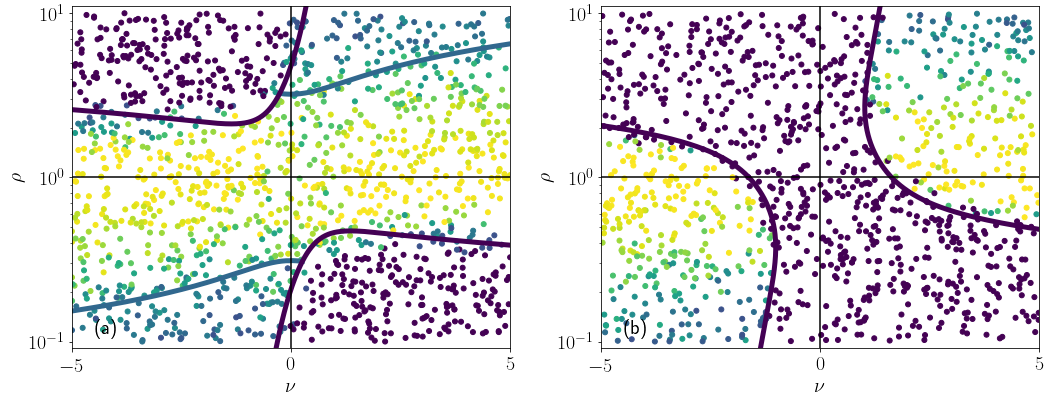

In [12]:
'''
    Proof that the equations for instability work
'''

import numpy as np
import matplotlib.pyplot as plt
import General_Solutions as gs

# working_directory = "/home_th/poley/Simulation_Infinite_Buckets_copy (5)/"
dir = gs.dir + "/Fig. S1, Data for Fig. 2 phase plots/"
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# written so you just have to copy paste the files relative path
def getData(relativePath, skipHeader = 0, comment = "#", Names = True):
    return np.genfromtxt(dir + relativePath, delimiter = ',', names = Names, skip_header=skipHeader, comments=comment)


plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})
N = 4
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.CMRmap(np.linspace(0,1,N)))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))

color1 = next(plt.gca()._get_lines.prop_cycler)['color']
color2 = next(plt.gca()._get_lines.prop_cycler)['color']
color3 = next(plt.gca()._get_lines.prop_cycler)['color']
color4 = next(plt.gca()._get_lines.prop_cycler)['color']
color5 = next(plt.gca()._get_lines.prop_cycler)['color']

# mu = 0.5 or -0.5
# sigma = 0.8 or 0.7
# gamma = 0.8

# general marker and other settings
lwidth = 5
msize = 800
malpha = 0.6
salpha = 1

for label, name, N, i in [[r"$\mu=-0.5, \sigma=0.5$","_sig=0.8_mu=0.5_gam=0.8", 200,1],[r"$\mu=-0.5, \sigma=0.7$","_sig=0.7_mu=-0.5_gam=0.8",200,0]]:


    data = getData("rho_nu_plane_stability"+name+".csv", 7, Names = None).reshape(-1, 5, N + 9)
    # print(data.shape)
    stabilityInfo = data[:, :, 5:9]
    stabilityInfo[:, :, -1] = 1-stabilityInfo[:, :, -1]

    minftyInfo = stabilityInfo[:, :, 0]
    opperInfo = stabilityInfo[:, :, 1:]

    opperInfo = np.prod(opperInfo, axis = 2)

    z0 = np.average(opperInfo, axis = 1)
    z1 = np.average(minftyInfo, axis = 1)

    Z = 0.3*z0 + 0.1
    Z[z1 <= 0.9] = 0.0

    paramInfo = data[:, :, :6]
    paramInfo = np.average(paramInfo, axis = 1)

    nu = paramInfo[:, 1]
    rho = paramInfo[:, 3]

    axs[i].scatter(nu, rho, c = Z, s = 25)


# bottom right, opper lines in the rho nu plane

opper_b = np.genfromtxt(dir + "oppersig=0.7.csv")
minfty_b = np.genfromtxt(dir + "minftysig=0.7mu=-0.5.csv")

# reverse to the axes can be aligned
opper_rho = opper_b[:, 0][::-1]
# interpolate so that the two curves have the same x coords, filling between two curves doesnt work without this
minfty_rho = np.concatenate((np.interp(np.linspace(-5, 1, 600), np.linspace(-5, 1, 500), minfty_b[:, 0]), np.full(400, 20)))

mask = (opper_rho <= minfty_rho)
axs[0].plot(np.linspace(-5, 5, 1000)[mask], opper_rho[mask], linewidth = lwidth, color = color2)
axs[0].plot(-np.linspace(-5, 5, 1000)[mask], 1/opper_rho[mask], linewidth = lwidth, color = color2)


axs[0].plot(np.linspace(-5, 5, 1000), minfty_rho, color = color1, linewidth = lwidth)
axs[0].plot(-np.linspace(-5, 5, 1000), 1/minfty_rho, color = color1, linewidth = lwidth)

# other settings 
axs[0].set_yscale("log")
axs[0].set_xlim(-5, 5)
axs[0].set_ylim(1/11, 11)
axs[0].hlines(1, -5, 5, zorder = 5)
axs[0].vlines(0, 0, 11, zorder = 5)

'''
    Panel (c)
'''

# Bottom left, Minfty lines in the rho nu plane
minfty_c = np.genfromtxt(dir + "minftysig=0.8mu=0.5.csv")
opper_c = np.genfromtxt(dir + "oppersig=0.8.csv")

minfty_nu = minfty_c[::-1, 0]
# interpolate so that the two curves have the same y coords, filling between two curves doesnt work without this
opper_nu = np.concatenate((np.interp(np.linspace(0.01, 5.156, 454), np.linspace(0.01, 5.155994326976409248e+00, 1200), opper_c[::-1, 0]), np.full(546, 10)))

axs[1].plot(minfty_nu, np.linspace(0.01, 11, 1000), color = color1, linewidth = lwidth)
axs[1].plot(-minfty_nu, 1/np.linspace(0.01, 11, 1000), color = color1, linewidth = lwidth)


axs[1].set_yscale("log")
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(1/11, 11)
axs[1].hlines(1, -5, 5, zorder = 5)
axs[1].vlines(0, 0, 11, zorder = 5)

'''
    Other settings
'''

# labels and ticks
axs[0].set_xticks([-5, 0, 5])
axs[0].set_yticks([0.1, 1, 10])
axs[0].set_xlabel(r"$\nu$")
axs[0].set_ylabel(r"$\rho$")

axs[1].set_xticks([-5, 0, 5])
axs[1].set_yticks([0.1, 1, 10])
axs[1].set_xlabel(r"$\nu$")
axs[1].set_ylabel(r"$\rho$")


# panel labels
axs[0].text(0.08, 0.06, '(a)', horizontalalignment='center', verticalalignment='center', transform = axs[0].transAxes)
axs[1].text(0.08, 0.06, '(b)', horizontalalignment='center', verticalalignment='center', transform = axs[1].transAxes)

fig.tight_layout()

# plt.savefig("Phase Diagram Proof.pdf")

In [ ]:
'''
    Cascade Matrix heatmap
'''

import numpy as np
import matplotlib.pyplot as plt

def random_cascade_matrix(mu_L, mu_U, sigma_L, sigma_U, gamma, N = 250):
    J = np.zeros((N, N))

    for i in range(N):
        for j in range(i):
            z1 = np.random.normal(0, 1)
            z2 = np.random.normal(0, 1)

            J[i, j] = mu_L/N + sigma_L*z1/np.sqrt(N)
            J[j, i] = mu_U/N + sigma_U*(gamma*z1 + np.sqrt(1 - gamma**2)*z2)/np.sqrt(N)

    return J

# next iteration, more complex cascade like matrix
# mu, sigma, and gamma are now functions
def random_correlated_matrix(f_mu, f_sigma, f_gamma, N = 250):
    J = np.zeros((N, N))

    for i in range(N):
        for j in range(i):
            z1 = np.random.normal(0, 1)
            z2 = np.random.normal(0, 1)

            J[i, j] = f_mu(i/N, j/N)/N + f_sigma(i/N, j/N)*z1/np.sqrt(N)
            J[j, i] = f_mu(j/N, i/N)/N + f_sigma(j/N, i/N)*(f_gamma(i/N, j/N)*z1 + np.sqrt(1 - f_gamma(i/N, j/N)**2)*z2)/np.sqrt(N)

    return J


plt.show()